In [473]:
# Importando bibliotecas
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB

# Importar a biblioteca para mostrar a matriz de confusão
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Importando bibliotecas para calcular métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Plotar gráficos
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import AllKNN  
from imblearn.over_sampling import ADASYN 

In [474]:
# Ler dados do DataSet
csv_dir_treinamento = "/content/sample_data/breast-cancer.csv"
data = pd.read_csv(csv_dir_treinamento, delimiter=",")

In [475]:
# Tratar dados nominais para númericos (Treinamento)
treinamento_classification = data['Class']
data.drop(["Class"], axis=1, inplace=True)
treinamento_dados = pd.get_dummies(data, columns=['menopause', 'breast-quad'])

In [476]:
# Substitui os valores nulos da coluna "node-caps" pelo valor mais frequente da coluna
data = data.mask(data == '?')
data = data.fillna(data.median().iloc[0])
data.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [477]:
# Atualizar tabela com binários
labelencoder =  preprocessing.LabelEncoder()
# node-caps: faltantes
treinamento_dados['breast'] = labelencoder.fit_transform(treinamento_dados['breast'])
treinamento_dados['irradiat'] = labelencoder.fit_transform(treinamento_dados['irradiat'])
treinamento_dados['node-caps'] = labelencoder.fit_transform(treinamento_dados['node-caps'])
treinamento_dados['age'] = labelencoder.fit_transform(treinamento_dados['age'])
treinamento_dados['tumor-size'] = labelencoder.fit_transform(treinamento_dados['tumor-size'])
treinamento_dados['inv-nodes'] = labelencoder.fit_transform(treinamento_dados['inv-nodes'])

In [478]:
# Separar dados de treinamento e de testes
dataset_treino, dataset_teste, dataset_treino_class, dataset_teste_class = train_test_split(treinamento_dados, treinamento_classification, test_size=0.20, random_state=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


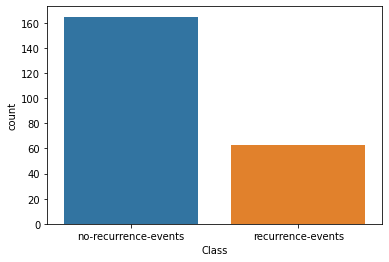

In [479]:
sns.countplot(dataset_treino_class)

In [480]:
# Fazer o balanceamento no dado principal, para o dataset de treino nao ficar sem dados de classificação
#smote = AllKNN()
smote = ADASYN()
dataset_treino, dataset_treino_class = smote.fit_resample(dataset_treino, dataset_treino_class)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


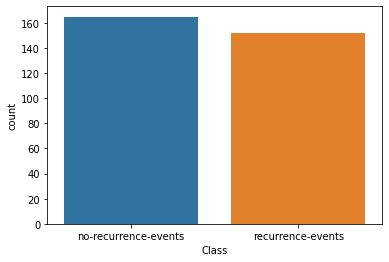

In [481]:
sns.countplot(dataset_treino_class)

In [482]:
tree_data = DecisionTreeClassifier(criterion="entropy")
tree_data.fit(dataset_treino, dataset_treino_class)

DecisionTreeClassifier(criterion='entropy')

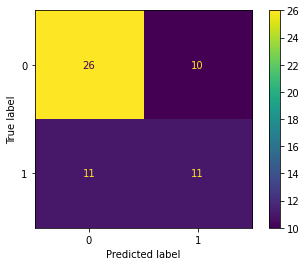

In [483]:
conf_matrix = confusion_matrix(dataset_teste_class, tree_data.predict(dataset_teste))
cmd = ConfusionMatrixDisplay(conf_matrix)
cmd.plot(values_format="d")
plt.show()

In [484]:
# Mostrar métricas
print('Árvore')
print("Accuracy score = ", accuracy_score(dataset_teste_class, tree_data.predict(dataset_teste)))
print(classification_report(dataset_teste_class, tree_data.predict(dataset_teste)))

Árvore
Accuracy score =  0.6379310344827587
                      precision    recall  f1-score   support

no-recurrence-events       0.70      0.72      0.71        36
   recurrence-events       0.52      0.50      0.51        22

            accuracy                           0.64        58
           macro avg       0.61      0.61      0.61        58
        weighted avg       0.63      0.64      0.64        58



In [485]:
gnb = GaussianNB()
gnb.fit(dataset_treino, dataset_treino_class)

GaussianNB()

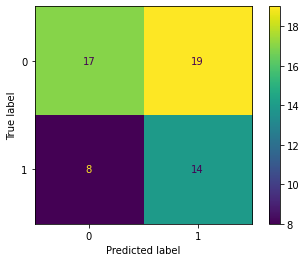

In [486]:
conf_matrix = confusion_matrix(dataset_teste_class, gnb.predict(dataset_teste))
cmd = ConfusionMatrixDisplay(conf_matrix)
cmd.plot(values_format="d")
plt.show()

In [487]:
# Mostrar métricas
print('Naive Bayes')
print("Accuracy score = ", accuracy_score(dataset_teste_class, gnb.predict(dataset_teste)))
print(classification_report(dataset_teste_class, gnb.predict(dataset_teste)))

Naive Bayes
Accuracy score =  0.5344827586206896
                      precision    recall  f1-score   support

no-recurrence-events       0.68      0.47      0.56        36
   recurrence-events       0.42      0.64      0.51        22

            accuracy                           0.53        58
           macro avg       0.55      0.55      0.53        58
        weighted avg       0.58      0.53      0.54        58



In [488]:
rforest = RandomForestClassifier()
rforest.fit(dataset_treino, dataset_treino_class)

RandomForestClassifier()

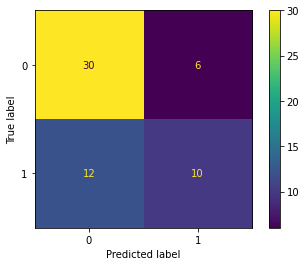

In [489]:
conf_matrix = confusion_matrix(dataset_teste_class, rforest.predict(dataset_teste))
cmd = ConfusionMatrixDisplay(conf_matrix)
cmd.plot(values_format="d")
plt.show()

In [490]:
# Mostrar métricas
print('Random Forest')
print("Accuracy score = ", accuracy_score(dataset_teste_class, rforest.predict(dataset_teste)))
print(classification_report(dataset_teste_class, rforest.predict(dataset_teste)))

Random Forest
Accuracy score =  0.6896551724137931
                      precision    recall  f1-score   support

no-recurrence-events       0.71      0.83      0.77        36
   recurrence-events       0.62      0.45      0.53        22

            accuracy                           0.69        58
           macro avg       0.67      0.64      0.65        58
        weighted avg       0.68      0.69      0.68        58

